Step 1: Acquire the dataset
We got the data from this google drive link. https://drive.google.com/drive/folders/16BK8_d1V-A3M1WQ0neaeCwqrHPfzH7QS?usp=sharing . This link is provided from Wei Shen where he gotten it from Mr.Afiq, the boss of Chili Lado.
However, we decided not to use all data in our dataset and we use a several important dataset only. This dataset is from Product and from Product Overview. 

At first we downloaded all the dataset into our local drive by using the dowload all button.

![DownloadAll](ChiliLadoData/DownloadAll.png)

All Data is downloaded in this zipped file, inside the zip file is all the dataset.

![ZippedFile](ChiliLadoData/ZippedFile.png)
![DownloadedFile](ChiliLadoData/DownloadedFile.png)

Based on our observation, it has dataset and it is from May 2023 to September 2023. All of them has 22 Column, however it has different number of rows. May, June, July, August, September has 32,31,32,32,31 rows respectively. The column names are:
1. Date
2. Product Visitors (Visit)
3. Product Page Views
4. Items Visited
5. Product Bounce Visitors
6. Product Bounce Rate
7. Search Clicks
8. Likes
9. Product Visitors (Add to Cart)
10. Units (Add to Cart)
11. Conversion Rate (Add to Cart)
12. Buyers (Placed Order)
13. Units (Placed Order)
14. Items Placed
15. Sales (Placed Order)(MYR)
16. Conversion Rate (Placed Order)
17. Buyers (Confirmed Order)
18. Units (Confirmed Order)
19. Items Confirmed
20. Sales (Confiremd Order)(MYR)
21. Conversion Rate (Confirmed Order)
22. Converison Rate (Placed to Confirmed)

We first combine all the 5 files together, however we decided to do it with copy and paste instead of using python code because it only has 5 files. We use Ctrl+C to copy all the rows and use Ctrl+V to paste the copied rows into a new Excel File called MergedFile.xlsx
![CopiedFile](ChiliLadoData/CopiedFile.png)

![PasteFile](ChiliLadoData/PasteFile.png)

We copied all five datasets into the MergedFile. However, for May 2023, we copy the whole file including the column names, while for other months,we only copied the data. We pasted the data beneath May 2023. We followed the same process for July 2023 and subsequent months.

![MayJune](ChiliLadoData/MayJune.png)

To check if the data is merged correctly, we calculate the total number of rows by adding the number of days in these 5 months and the row contains attribute name which is 31 + 30 + 31 + 31 + + 30 + 1 = 154, as our MergedFile has 154 rows means that we had merged it correctly.

Now the data can be used for the next few steps.


Step 2: Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 3: Import the dataset
We import the dataset from our local directory. We created a file named ChiliLadoData and stored all the dataset and picture used there.

In [3]:
df = pd.read_excel('MergedFile.xlsx')

Step 4: Clean the data by dentifying and handling missing value, abnormality, outliers and redundancy
Initially, almost all the data in the Excel file was not numerical data.

![ConvertData](ChiliLadoData/ConvertData.png)

Therefore, we converted all the data in the dataset into numerical values by selecting the "Convert to Number" option in Excel to prevent potential errors. You can identify non-numeric data when the left upper corner of the cell is marked in green.

![Number](ChiliLadoData/Number.png)

If all the cells are white, it indicates that we have successfully converted the data into numerical values. Now, we can proceed with using Python for data preprocessing.

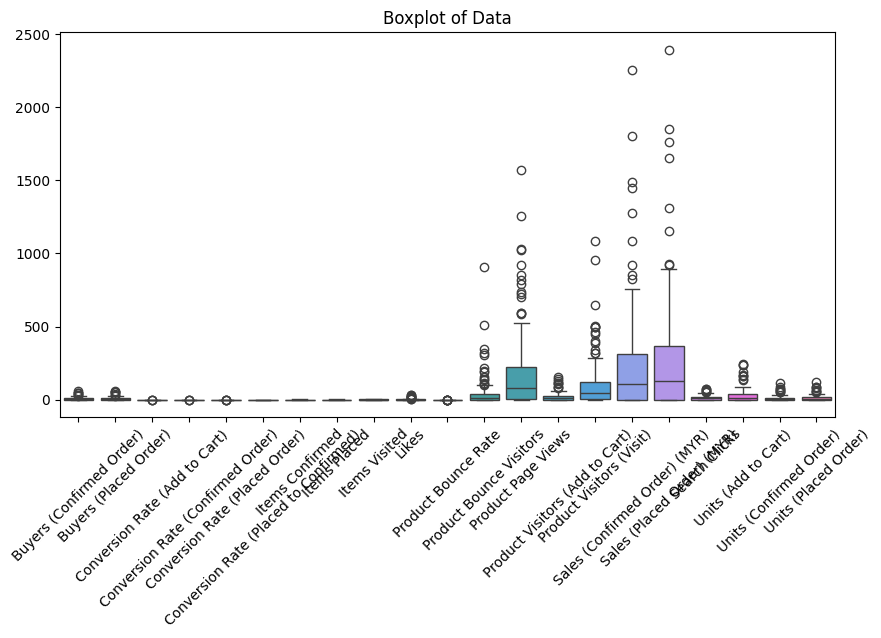

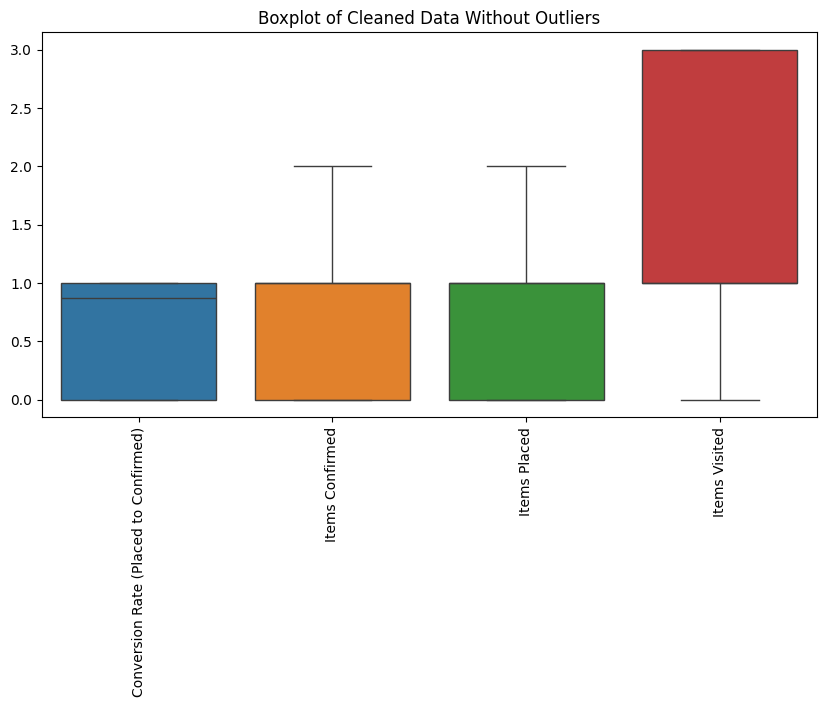

,Conversion Rate (Placed to Confirmed),Items Confirmed,Items Placed,Items Visited
0,0.0000,0,0,1
1,1.0000,1,1,1
2,0.0000,0,0,1
3,0.0000,0,0,1
4,0.0000,0,0,1
...,...,...,...,...
118,1.0000,1,1,1
119,0.9091,1,1,1
120,1.0000,1,1,3
121,0.8889,1,1,1


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the 'Date' column
outliersdf = df.drop(columns=['Date'])

plt.figure(figsize=(10, 5))
sns.boxplot(data=outliersdf)
plt.title("Boxplot of Data")
plt.xticks(rotation=45)
plt.show()

Q1 = outliersdf.quantile(0.25, numeric_only=True)
Q3 = outliersdf.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Align the DataFrames
outliers, IQR = outliersdf.align(IQR, axis=1, copy=False)

# Calculate the outlier condition
outlier_condition = ((outliers < (Q1 - 1.5 * IQR)) | (outliers > (Q3 + 1.5 * IQR))).any(axis=0)

# Ensure that outlier_condition is a boolean Series
outlier_condition = outlier_condition.astype(bool)

# Filter the DataFrame based on the boolean Series
df_clean = outliersdf.loc[:, ~outlier_condition]

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean)
plt.title("Boxplot of Cleaned Data Without Outliers")
plt.xticks(rotation=90)
plt.show()

display(df_clean)

